<a href="https://colab.research.google.com/github/aditya02shah/FashionImageGeneration/blob/main/Fashion_Images_Generation(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt

##Importing Data

In [ ]:
ds = tfds.load('fashion_mnist', split='train')
type(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteON4TBM/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteON4TBM/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


tensorflow.python.data.ops.dataset_ops.PrefetchDataset

##Data Visualization

In [ ]:
dataiterator=ds.as_numpy_iterator()

In [ ]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

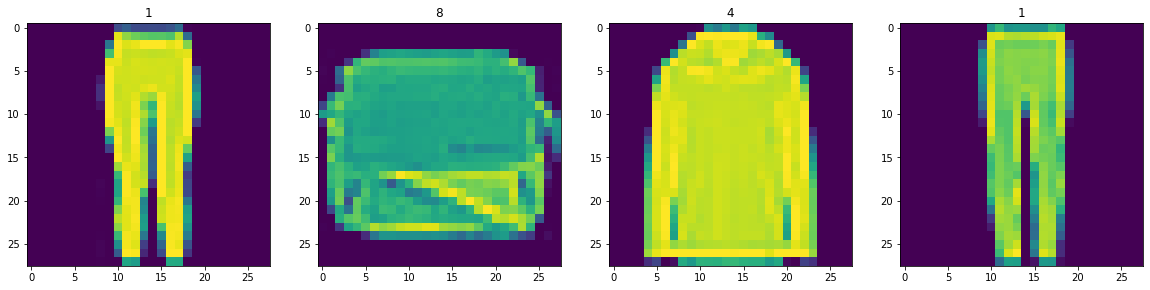

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  sample=dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])


In [ ]:
def scale_images(data):
  image=data['image']
  return image/255

##Data Pipelining

In [ ]:
#mscbp
ds=ds.map(scale_images)
ds=ds.shuffle(60000)
ds=ds.cache()       #increasing data retrieval performance
ds=ds.batch(128)
ds=ds.prefetch(64)  #reduces likelihood of bottlenecking

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

##Building GAN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [ ]:
##Building Generator
def build_generator():
  #1st Block-Takes in random values and reshapes it to (7,7,128)-Beginnings of generated images
  model=Sequential()
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #2nd Block-Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #3rd Block-Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #4th Block-Convolutional block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #5th Block-Convolutional block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #Conv Layer to get to 1 channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
  return model

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 8s 8s/step


array([[[[0.49573192],
         [0.48958927],
         [0.4970056 ],
         ...,
         [0.49875048],
         [0.49626738],
         [0.49255988]],

        [[0.50391006],
         [0.49429825],
         [0.4967775 ],
         ...,
         [0.4903657 ],
         [0.4943734 ],
         [0.49146962]],

        [[0.50766116],
         [0.50314784],
         [0.5049079 ],
         ...,
         [0.49342686],
         [0.49143615],
         [0.49199182]],

        ...,

        [[0.49792293],
         [0.4990801 ],
         [0.50370294],
         ...,
         [0.5074099 ],
         [0.4941214 ],
         [0.49205548]],

        [[0.50803757],
         [0.5045236 ],
         [0.50892615],
         ...,
         [0.5067639 ],
         [0.50213313],
         [0.49870303]],

        [[0.5066714 ],
         [0.5058125 ],
         [0.51238954],
         ...,
         [0.50489306],
         [0.501154  ],
         [0.5015927 ]]],


       [[[0.5013237 ],
         [0.4931986 ],
         [0.48

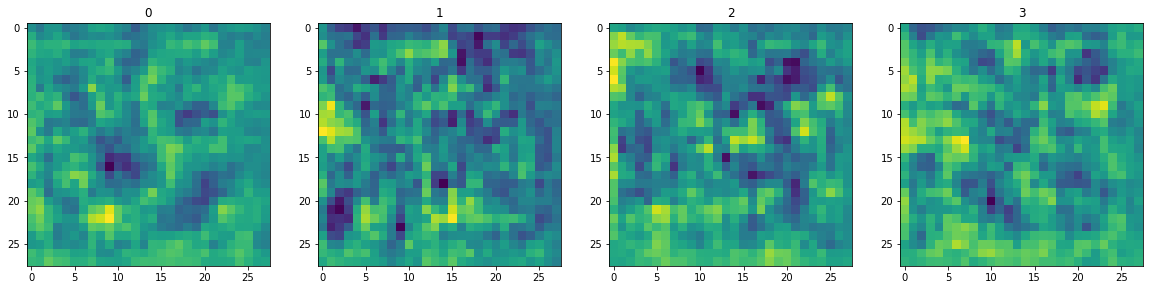

In [ ]:
##Images generated before training
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [ ]:
##Building Discriminator
def build_discriminator():
  model=Sequential()

  #1st Conv Block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #2nd Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #3rd Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #4th Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to Dense Layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

  #Output:0-Real Image,1-Fake Image

In [ ]:
discriminator=build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img1=generator.predict(np.random.rand(4,128,1))
discriminator.predict(img1)

1/1 [==============================] - 0s 169ms/step


array([[0.50155365],
       [0.5015038 ],
       [0.5015004 ],
       [0.50149244]], dtype=float32)

##Training Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.generator=generator
    self.discriminator=discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self,batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)),training=False)

    #Training Discriminator
    with tf.GradientTape() as d_tape:
      yhat_real=self.discriminator(real_images,training=True)
      yhat_fake=self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)

      #assigning labels
      y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      #adding noise
      noise_real=0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake=-0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

      #calculate loss
      total_d_loss=self.d_loss(y_realfake,yhat_realfake)

    dgrad=d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    #Training Generator
    with tf.GradientTape() as g_tape:
      gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
      predicted_labels=self.discriminator(gen_images,training=False)
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels )

    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
fashgan=FashionGAN(generator,discriminator)

In [ ]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

##CallBack

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('GANimages', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist=fashgan.fit(ds,epochs=10)

Epoch 1/10
469/469 [==============================] - 84s 157ms/step - d_loss: 0.5164 - g_loss: 1.0756
Epoch 2/10
469/469 [==============================] - 79s 167ms/step - d_loss: 0.4971 - g_loss: 3.3895
Epoch 3/10
469/469 [==============================] - 78s 167ms/step - d_loss: 0.6896 - g_loss: 0.7213
Epoch 4/10
469/469 [==============================] - 78s 167ms/step - d_loss: 0.6988 - g_loss: 0.6546
Epoch 5/10
469/469 [==============================] - 78s 167ms/step - d_loss: 0.6952 - g_loss: 0.6440
Epoch 6/10
469/469 [==============================] - 78s 167ms/step - d_loss: 0.6947 - g_loss: 0.6554
Epoch 7/10
469/469 [==============================] - 79s 167ms/step - d_loss: 0.6859 - g_loss: 0.6765
Epoch 8/10
469/469 [==============================] - 79s 167ms/step - d_loss: 0.6931 - g_loss: 0.6514
Epoch 9/10
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6929 - g_loss: 0.6514
Epoch 10/10
469/469 [==============================] - 78s 167ms/step - d

##Review Performance

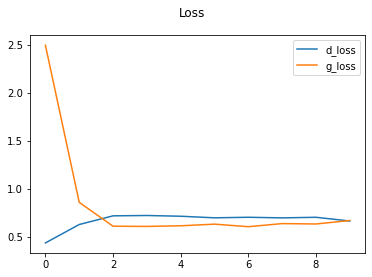

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

##Testing the Generator

In [ ]:
img_pred = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 19ms/step


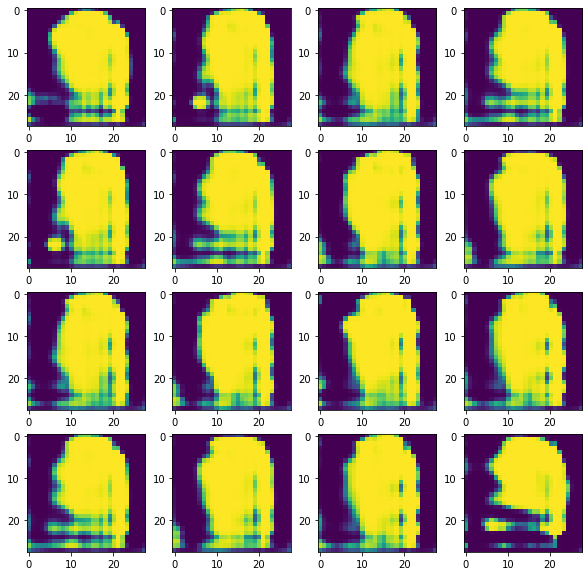

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])